# Otimização de Modelo Pré-Treinado para Detecção de Fraudes em Cartões de Crédito

## Inteli - Sistemas de Informação - Programação
- **Professor**👨‍🏫: Jefferson de Oliveira Silva
- **Aluno**👨‍🎓: Pedro de Carvalho Rezende

### Objetivo🚨
Otimizar um modelo de rede neural pré-treinado para detecção de fraudes em cartões de crédito. Aplicar técnicas avançadas de ajuste fino de hiperparâmetros, como grid search e random search, com o objetivo de aprimorar as métricas de desempenho do modelo, incluindo precisão, recall, F1-score e AUC-ROC. A atividade também exige uma comparação entre o modelo otimizado e o modelo original, permitindo avaliar o impacto das modificações nos hiperparâmetros sobre o desempenho geral.


### Instruções📃
Para realizar esta atividade, você deve começar treinando o modelo de rede neural para detecção de fraudes em cartões de crédito. Os dados do cartão podem ser encontrados no link de conteúdo. Depois, obtenha as métricas de desempenho deste modelo como a precisão, recall, F1-score e AUC-ROC.  

Em seguida, defina uma faixa de valores para os hiperparâmetros que deseja otimizar. Aplique técnicas de ajuste fino de hiperparâmetros para melhorar o desempenho do modelo. Você pode usar métodos como grid search e random search para encontrar as melhores combinações de hiperparâmetros.

Após otimizar o modelo, compare os resultados obtidos com os resultados do modelo original. Analise como as mudanças nos hiperparâmetros impactaram o desempenho, considerando cada uma das métricas mencionadas. Por fim, documente todas as etapas realizadas e as observações feitas durante o processo.

Entregue o link do caderno `.ipynb` em um repositório GitHub.

# Instalações e Importações

In [55]:
# %pip install -q -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [69]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.metrics import BinaryAccuracy, AUC, Precision, Recall, Accuracy
from tensorflow.keras.optimizers import Adam, Lion, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from scikeras.wrappers import KerasClassifier, KerasRegressor

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, make_scorer, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
# baixando o dataset utilizado
!gdown 1Scb-zICL_-JG4n31I5F5_FM5X53zerWi

Downloading...
From (original): https://drive.google.com/uc?id=1Scb-zICL_-JG4n31I5F5_FM5X53zerWi
From (redirected): https://drive.google.com/uc?id=1Scb-zICL_-JG4n31I5F5_FM5X53zerWi&confirm=t&uuid=d277a6e1-a7db-4adf-bf8f-818b7788b33a
To: /content/creditcard.csv
100% 151M/151M [00:06<00:00, 22.2MB/s]


# Exploratória do Dataset

O dataset escolhido foi de Detecção de fraudes em cartões de crédito (https://drive.google.com/file/d/1nriPPuYUMXeB6BkCjz_bQI_45WZfxViC/view?usp=drive_link).

Este dataset contém informações sobre jogos disponíveis na plataforma Steam, incluindo o nome do jogo, a descrição, o preço, a data de lançamento, a avaliação dos usuários, entre outras informações.

In [4]:
df = pd.read_csv('creditcard.csv')
df['Time'] = df['Time'].astype('int64') # fiz essa adaptação pois essa coluna aparenta ser algo como o ID do cliente
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


- Aqui temos uma coluna de `Time` que aparenta ser algo como o ID do cliente
- Todas as colunas de `Vn`, aparentam ser algo como uma característica que pode ter levado à Fraude
- A coluna de `Amount` seria o valor gasto
- A coluna de `Class` é se aquele registro foi confirmado ou não como Fraude

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- aqui vemos como a mesma quantia gasta se repete diversas vezes

In [7]:
df['Amount'].value_counts()

,count
Amount,
1.00,13688
1.98,6044
0.89,4872
9.99,4747
15.00,3280
...,...
62.09,1
552.05,1
1467.75,1


- Aqui verificamos as quantias gastas presentes em Fraudes

In [8]:
df['Amount'][df['Class'] == 1].value_counts()

,count
Amount,
1.00,113
0.00,27
99.99,27
0.76,17
0.77,10
...,...
294.90,1
720.38,1
31.91,1


In [9]:
df['Amount'][df['Class'] == 1].value_counts().head(10)

,count
Amount,
1.00,113
0.00,27
99.99,27
0.76,17
0.77,10
0.01,5
2.00,4
3.79,4
2.28,3


- existe uma disparidade alta entre os valores de Fraude e não Fraude

In [10]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


- Aqui é possível analisar como o registro do mesmo cliente aparece mais de uma vez

In [11]:
df['Time'].value_counts()[df['Time'].value_counts() > 10]

,count
Time,
163152,36
64947,26
68780,25
3767,21
3770,20
...,...
33534,11
127266,11
155852,11


- Aqui verificamos a quantidade de vezes que um mesmo registro Fraudou mais de uma vez

In [12]:
df['Time'][df['Class'] == 1].value_counts()

,count
Time,
68207,6
93879,4
84204,4
93853,4
93860,4
...,...
45501,1
45463,1
44532,1


In [13]:
df['Time'][df['Class'] == 1].value_counts().head(10)

,count
Time,
68207,6
93879,4
84204,4
93853,4
93860,4
85285,4
94362,4
148053,2
102542,1


# Normalização

In [14]:
def normalize_columns(df, column_name = list):
    # Cria uma instância do RobustScaler
    scaler = RobustScaler()

    # Ajusta o scaler à coluna e transforma os dados
    df_normalized = df.copy()
    for column in column_name:
      df_normalized[column] = scaler.fit_transform(df[[column]])

    return df_normalized

In [15]:
# Seleciona todas as colunas exceto 'Time' e 'Class'
columns_to_normalize = df.columns[(df.columns != 'Time') & (df.columns != 'Class')]

# Chama a função normalize_columns com as colunas selecionadas
normalize_columns(df, columns_to_normalize)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,0,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,1,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,1,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,2,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-5.321622,7.135767,-5.222589,-1.285699,-4.073679,-1.999082,-4.409307,13.588260,1.585066,...,0.585633,0.098124,3.314091,-0.693006,2.126512,0.532055,5.820867,6.190862,-0.296653,0
284803,172787,-0.335820,-0.085979,0.967471,-0.451476,0.707747,1.142041,-0.014027,0.508439,0.512990,...,0.587444,0.856848,0.076436,-1.331299,-0.933155,-0.604145,0.414680,-0.493534,0.038986,0
284804,172788,0.850377,-0.261532,-1.788463,-0.337932,2.059687,2.832770,-0.299623,1.280019,0.390154,...,0.630455,0.533612,-0.085005,0.754500,0.373060,-0.062034,0.019227,-0.288058,0.641096,0
284805,172788,-0.115629,0.331602,0.272567,0.445763,-0.248270,0.769496,-0.645865,1.225405,0.357606,...,0.710499,0.740745,-0.491472,0.103549,-0.877058,1.054357,0.663921,0.710829,-0.167680,0


# Rede Neural + Hiperparâmetros

Para a aplicação da Rede Neural, foram feitos 3 testes. Sendo eles:
1. Sem balanceamento do target;
2. Oversample para balanceamento;
3. UnderSample para o balanceamento

Para construção do modelo, com o otimizados, neuronios e camadas, foi utilizado parecido como aplicado no projeto.

Para a aplicação de hiperparâmetros, foram feitos testes alterando e utilizando diferentes aspectos e características dos tópicos abaixo:
- Número de camadas ocultas: No inicio trabalhei com 5 camadas ocultas, depois permaneci com 3.
- Número de neurônios em cada camada: Enquanto eu estava com 5 camadas, trabalhei com 256/128/64/32/16, agora estou somente com 64/32/16.
- Taxa de aprendizado: fui fazendo diferentes testes com a taxa de aprendizado
- Batch size: foram testados diferentes tamanhos de batch sizes na hora de rodar.
- Otimizador: foi testado primeiro o Lion e depois o Adam

Os códigos abaixo podem até não apresentar essa variedade de testes, porém, fiz uma estrutura de função e utilização do `RandomizedSearchCV` para aplicar essa variabilidade

In [95]:
def create_model(x_train, optimizer='adam', learn_rate=0.01):
  # Define a arquitetura do modelo (arquitetura em pirâmide)
  model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
  ])

  if optimizer == 'adam':
    optimizer = Adam(learning_rate=learn_rate)
  elif optimizer == 'lion':
    optimizer = Lion(learning_rate=learn_rate)
  else:
    print('Otimizador não reconhecido')
    return None

  model.compile(
      optimizer=optimizer,
      loss='binary_crossentropy',
      metrics=[Accuracy(),
                Precision(),
                Recall(),
                AUC()])

  return model

In [96]:
X = df.drop(columns=['Time', 'Class'], axis=1)
y = df['Class']

## Modelo sem balanceamento

In [97]:
fig = px.bar(y.value_counts(), title='Distribuição das Classes')
fig.show()

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
model = create_model(X_train)

model.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_186 (Dense)                    │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
history = model.fit(X_train,
                    y_train.to_numpy(),
                    epochs=30,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/30
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0886 - auc_27: 0.7439 - loss: 0.0310 - precision_27: 0.6368 - recall_27: 0.1751 - val_accuracy: 0.0000e+00 - val_auc_27: 0.8778 - val_loss: 0.0050 - val_precision_27: 0.8252 - val_recall_27: 0.6250
Epoch 2/30
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0019 - auc_27: 0.8941 - loss: 0.0074 - precision_27: 0.6402 - recall_27: 0.2773 - val_accuracy: 0.0000e+00 - val_auc_27: 0.8777 - val_loss: 0.0057 - val_precision_27: 0.0000e+00 - val_recall_27: 0.0000e+00
Epoch 3/30
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 4.8951e-04 - auc_27: 0.8481 - loss: 0.0067 - precision_27: 0.6565 - recall_27: 0.1953 - val_accuracy: 5.8519e-05 - val_auc_27: 0.8343 - val_loss: 0.0062 - val_precision_27: 0.7596 - val_recall_27: 0.5809
Epoch 4/30
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0090 - auc_27: 0.8328 - loss: 0.0110 - precision_27: 0.7502 - recall_27: 0.6548 - val_accuracy: 0.0016 - val_auc_27: 0

In [101]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}, F1-Score: {f1_score}, Precision: {precision}, Recall: {recall}, AUC: {roc_auc_score(y_test, model.predict(X_test))}')

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1269 - auc_27: 0.7622 - loss: 0.0075 - precision_27: 0.7315 - recall_27: 0.5248
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Loss: 0.006330190692096949, Accuracy: 0.12836627662181854, F1-Score: 0.7678571343421936, Precision: 0.6323529481887817, Recall: 0.8160154819488525, AUC: 0.8665349854056527


## Construção do Modelo - OverSampler

In [102]:
smote = SMOTE(random_state=42)
X_resampled_s, y_resampled_s = smote.fit_resample(X, y)

In [103]:
fig = px.bar(y_resampled_s.value_counts(), title='Distribuição das Classes - OverSampler')
fig.show()

In [104]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_resampled_s, y_resampled_s, test_size=0.3, random_state=42)

In [105]:
model = create_model(X_train_s)

model.summary()

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_190 (Dense)                    │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_193 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
history = model.fit(X_train_s,
                    y_train_s.to_numpy(),
                    epochs=30,
                    batch_size=50,
                    verbose=1,
                    validation_data=(X_test_s, y_test_s))

Epoch 1/30
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.2123 - auc_28: 0.9914 - loss: 0.1121 - precision_28: 0.9761 - recall_28: 0.9638 - val_accuracy: 0.3921 - val_auc_28: 0.9982 - val_loss: 0.0511 - val_precision_28: 0.9803 - val_recall_28: 0.9966
Epoch 2/30
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.2901 - auc_28: 0.9971 - loss: 0.0599 - precision_28: 0.9922 - recall_28: 0.9685 - val_accuracy: 0.4813 - val_auc_28: 0.9965 - val_loss: 0.0585 - val_precision_28: 0.9980 - val_recall_28: 0.9635
Epoch 3/30
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.5308 - auc_28: 0.9976 - loss: 0.0502 - precision_28: 0.9953 - recall_28: 0.9746 - val_accuracy: 0.4220 - val_auc_28: 0.9989 - val_loss: 0.0300 - val_precision_28: 0.9978 - val_recall_28: 0.9836
Epoch 4/30
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.6222 - auc_28: 0.9906 - loss: 0.1358 - precision_28: 0.9741 - recall_28: 0.9246 - val_accuracy: 0.6831 - val_auc_28: 0.9916 - val_loss: 0.1067

In [107]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_s, y_test_s)
print(f'Loss: {loss}, Accuracy: {accuracy}, F1-Score: {f1_score}, Precision: {precision}, Recall: {recall}, AUC: {roc_auc_score(y_test, model.predict(X_test))}')

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7824 - auc_28: 0.9816 - loss: 0.1481 - precision_28: 0.9997 - recall_28: 0.8772
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Loss: 0.14785389602184296, Accuracy: 0.7836964726448059, F1-Score: 0.9996528625488281, Precision: 0.8763108849525452, Recall: 0.9816616773605347, AUC: 0.9793549284625287


## Construção do Modelo - UnderSampler

In [108]:
rus = RandomUnderSampler(random_state=42)
X_resampled_r, y_resampled_r = rus.fit_resample(X, y)

In [109]:
fig = px.bar(y_resampled_r.value_counts(), title='Distribuição das Classes - UnderSampler')
fig.show()

In [110]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled_r, y_resampled_r, test_size=0.3, random_state=42)

In [111]:
model = create_model(X_train_r)

model.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_194 (Dense)                    │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_195 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
history = model.fit(X_train_r,
                    y_train_r.to_numpy(),
                    epochs=30,
                    batch_size=50,
                    verbose=1,
                    validation_data=(X_test_r, y_test_r))

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.0738 - auc_29: 0.6538 - loss: 2.5038 - precision_29: 0.6013 - recall_29: 0.7538 - val_accuracy: 0.1047 - val_auc_29: 0.8957 - val_loss: 0.5847 - val_precision_29: 0.8803 - val_recall_29: 0.8562
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1173 - auc_29: 0.9393 - loss: 0.4602 - precision_29: 0.8625 - recall_29: 0.9109 - val_accuracy: 0.1318 - val_auc_29: 0.8337 - val_loss: 1.7268 - val_precision_29: 0.9576 - val_recall_29: 0.7740
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2190 - auc_29: 0.9066 - loss: 0.9772 - precision_29: 0.8968 - recall_29: 0.8780 - val_accuracy: 0.3041 - val_auc_29: 0.9544 - val_loss: 0.5977 - val_precision_29: 0.7853 - val_recall_29: 0.9521
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2502 - auc_29: 0.9396 - loss: 0.5082 - precision_29: 0.8848 - recall_29: 0.9226 - val_accuracy: 0.2838 - val_auc_29: 0.9621 - val_loss: 0.2805 - val_precision_29

In [113]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_r, y_test_r)
print(f'Loss: {loss}, Accuracy: {accuracy}, F1-Score: {f1_score}, Precision: {precision}, Recall: {recall}, AUC: {roc_auc_score(y_test, model.predict(X_test))}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3772 - auc_29: 0.9151 - loss: 1.2753 - precision_29: 0.9115 - recall_29: 0.8530 
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Loss: 0.8819458484649658, Accuracy: 0.40202704071998596, F1-Score: 0.9552238583564758, Precision: 0.8767123222351074, Recall: 0.9351826310157776, AUC: 0.9777646514078219


# Hiperparâmetros

In [92]:
model = KerasClassifier(model=create_model, x_train=X_train_r, optimizer='adam', learn_rate=0.01)

param_dist = {
    'model__optimizer': 'adam',
    'batch_size': [64, 128],
    'epochs': [30, 45],
    'model__learn_rate': [0.01, 0.1]
}

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1,
    scoring=scoring,
    refit='accuracy'
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Otimizador não reconhecido
[CV] END batch_size=64, epochs=20, model__learn_rate=0.001, model__optimizer=rmsprop; total time=   0.1s
Otimizador não reconhecido
[CV] END batch_size=64, epochs=20, model__learn_rate=0.001, model__optimizer=rmsprop; total time=   0.1s
Otimizador não reconhecido
[CV] END batch_size=64, epochs=20, model__learn_rate=0.001, model__optimizer=rmsprop; total time=   0.1s
Otimizador não reconhecido
[CV] END batch_size=128, epochs=45, model__learn_rate=0.001, model__optimizer=rmsprop; total time=   0.1s
Otimizador não reconhecido
[CV] END batch_size=128, epochs=45, model__learn_rate=0.001, model__optimizer=rmsprop; total time=   0.1s
Otimizador não reconhecido
[CV] END batch_size=128, epochs=45, model__learn_rate=0.001, model__optimizer=rmsprop; total time=   0.1s
Epoch 1/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0209 - auc_11: 0.6578 - loss: 0.9058 - precision_11: 0.0231 - recall_11: 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



1039/1039 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0405 - auc_18: 0.8291 - loss: 0.0531 - precision_18: 0.3101 - recall_18: 0.4968
Epoch 2/30
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0022 - auc_18: 0.8991 - loss: 0.0085 - precision_18: 0.8494 - recall_18: 0.6369
Epoch 3/30
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0028 - auc_18: 0.9217 - loss: 0.0052 - precision_18: 0.8719 - recall_18: 0.6674
Epoch 4/30
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 8.0897e-04 - auc_18: 0.9155 - loss: 0.0056 - precision_18: 0.8223 - recall_18: 0.6051
Epoch 5/30
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0496 - auc_18: 0.8991 - loss: 0.0141 - precision_18: 0.6528 - recall_18: 0.4892
Epoch 6/30
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0145 - auc_18: 0.9067 - loss: 0.0065 - precision_18: 0.8958 - recall_18: 0.5543
Epoch 7/30
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0012 - auc_18: 0.9390 - loss: 0.0051 - precision_18

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



1039/1039 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0400 - auc_19: 0.7840 - loss: 0.1034 - precision_19: 0.1761 - recall_19: 0.1800
Epoch 2/30
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0019 - auc_19: 0.8940 - loss: 0.0090 - precision_19: 0.0000e+00 - recall_19: 0.0000e+00
Epoch 3/30
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0015 - auc_19: 0.9230 - loss: 0.0069 - precision_19: 0.0000e+00 - recall_19: 0.0000e+00
Epoch 4/30
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0018 - auc_19: 0.9531 - loss: 0.0051 - precision_19: 0.4983 - recall_19: 0.1312
Epoch 5/30
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 5.2730e-04 - auc_19: 0.9245 - loss: 0.0060 - precision_19: 0.8689 - recall_19: 0.5532
Epoch 6/30
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0056 - auc_19: 0.9329 - loss: 0.0055 - precision_19: 0.8821 - recall_19: 0.5741
Epoch 7/30
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0015 - auc_19: 0.8913 - loss: 0.005

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



1039/1039 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0705 - auc_21: 0.5350 - loss: 0.6749 - precision_21: 0.0836 - recall_21: 0.0062
Epoch 2/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - auc_21: 0.4932 - loss: 0.0122 - precision_21: 0.0000e+00 - recall_21: 0.0000e+00
Epoch 3/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - auc_21: 0.4995 - loss: 0.0126 - precision_21: 0.0000e+00 - recall_21: 0.0000e+00
Epoch 4/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - auc_21: 0.4971 - loss: 0.0143 - precision_21: 0.0000e+00 - recall_21: 0.0000e+00
Epoch 5/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - auc_21: 0.4995 - loss: 0.0143 - precision_21: 0.0000e+00 - recall_21: 0.0000e+00
Epoch 6/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - auc_21: 0.5000 - loss: 0.0142 - precision_21: 0.0000e+00 - recall_21: 0.0000e+00
Epoch 7/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



1039/1039 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1131 - auc_22: 0.5256 - loss: 0.6033 - precision_22: 0.0000e+00 - recall_22: 0.0000e+00
Epoch 2/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0408 - auc_22: 0.4995 - loss: 0.0143 - precision_22: 0.0000e+00 - recall_22: 0.0000e+00
Epoch 3/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0426 - auc_22: 0.4986 - loss: 0.0129 - precision_22: 0.0000e+00 - recall_22: 0.0000e+00
Epoch 4/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0461 - auc_22: 0.4990 - loss: 0.0130 - precision_22: 0.0000e+00 - recall_22: 0.0000e+00
Epoch 5/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0428 - auc_22: 0.4957 - loss: 0.0130 - precision_22: 0.0000e+00 - recall_22: 0.0000e+00
Epoch 6/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0689 - auc_22: 0.4980 - loss: 0.1428 - precision_22: 0.0000e+00 - recall_22: 0.0000e+00
Epoch 7/45
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



[CV] END batch_size=128, epochs=45, model__learn_rate=0.1, model__optimizer=adam; total time= 2.2min
Otimizador não reconhecido
[CV] END batch_size=32, epochs=20, model__learn_rate=0.01, model__optimizer=rmsprop; total time=   0.1s
Otimizador não reconhecido
[CV] END batch_size=32, epochs=20, model__learn_rate=0.01, model__optimizer=rmsprop; total time=   0.1s
Otimizador não reconhecido
[CV] END batch_size=32, epochs=20, model__learn_rate=0.01, model__optimizer=rmsprop; total time=   0.1s
Epoch 1/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0840 - auc_23: 0.7944 - loss: 0.0835 - precision_23: 0.3492 - recall_23: 0.3965
Epoch 2/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0018 - auc_23: 0.9087 - loss: 0.0089 - precision_23: 0.8314 - recall_23: 0.5459
Epoch 3/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 1.4627e-04 - auc_23: 0.9002 - loss: 0.0053 - precision_23: 0.8292 - recall_23: 0.5530
Epoch 4/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



[CV] END batch_size=64, epochs=45, model__learn_rate=0.01, model__optimizer=adam; total time= 5.4min
Epoch 1/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0546 - auc_24: 0.7892 - loss: 0.0458 - precision_24: 0.3641 - recall_24: 0.2721
Epoch 2/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0038 - auc_24: 0.8977 - loss: 0.0090 - precision_24: 0.8166 - recall_24: 0.5196
Epoch 3/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0026 - auc_24: 0.8959 - loss: 0.0078 - precision_24: 0.7382 - recall_24: 0.4350
Epoch 4/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0927 - auc_24: 0.8681 - loss: 0.0274 - precision_24: 0.6591 - recall_24: 0.4217
Epoch 5/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2471 - auc_24: 0.4993 - loss: 0.1625 - precision_24: 0.0040 - recall_24: 3.1524e-04
Epoch 6/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1786 - auc_24: 0.4949 - loss: 0.0234 - precision_24: 0.0000e+00 - recall_24: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0785 - auc_25: 0.7849 - loss: 0.0670 - precision_25: 0.1843 - recall_25: 0.1325
Epoch 2/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0464 - auc_25: 0.8599 - loss: 0.0215 - precision_25: 0.3133 - recall_25: 0.0991
Epoch 3/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0114 - auc_25: 0.4899 - loss: 0.0125 - precision_25: 0.0000e+00 - recall_25: 0.0000e+00
Epoch 4/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0060 - auc_25: 0.4981 - loss: 0.0123 - precision_25: 0.0000e+00 - recall_25: 0.0000e+00
Epoch 5/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0517 - auc_25: 0.5587 - loss: 0.0164 - precision_25: 0.0000e+00 - recall_25: 0.0000e+00
Epoch 6/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1404 - auc_25: 0.4962 - loss: 0.0165 - precision_25: 0.0000e+00 - recall_25: 0.0000e+00
Epoch 7/45
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1157 - auc_25: 0.4980 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    def _fit_and_score(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1501, in fit
    super().fi

1558/1558 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0214 - auc_26: 0.8045 - loss: 0.0597 - precision_26: 0.3101 - recall_26: 0.4794
Epoch 2/45
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0106 - auc_26: 0.9123 - loss: 0.0108 - precision_26: 0.8115 - recall_26: 0.7508
Epoch 3/45
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0027 - auc_26: 0.9021 - loss: 0.0089 - precision_26: 0.8398 - recall_26: 0.7027
Epoch 4/45
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0020 - auc_26: 0.9246 - loss: 0.0051 - precision_26: 0.8492 - recall_26: 0.7457
Epoch 5/45
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0016 - auc_26: 0.9247 - loss: 0.0055 - precision_26: 0.8567 - recall_26: 0.7291
Epoch 6/45
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 4.5931e-04 - auc_26: 0.9491 - loss: 0.0034 - precision_26: 0.8545 - recall_26: 0.7816
Epoch 7/45
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0029 - auc_26: 0.9092 - loss: 0.0065 - precision_26

RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(learn_rate=0.01, model=<function create_model at 0x7ade3d0d6f80>, optimizer='adam', x_train=               V1         V2         V3        V4         V5        V6  \
61278    1.482387  -0.588294  -1.804074 -1.826507   1.883006  2.862792   
8845    -4.727713   3.044469  -5.598354  5.928191  -2.190770 -1.529323   
151007 -26.457745  16.497472 -30.177317  8.904157 -17.892600 -1.227904   
6427     0.725646   2.300894  -5.3299...
135603   24.18  

[688 rows x 29 columns]),
                   n_jobs=1,
                   param_distributions={'batch_size': [32, 64, 128],
                                        'epochs': [20, 30, 45],
                                        'model__learn_rate': [0.001, 0.01, 0.1],
                                        'model__optimizer': ['adam',
                                                             'rmsprop']},
                   random_state=42, refit='accuracy',
                   scoring={'accuracy': make_scorer(accuracy_score),
                            'precision': make_scorer(precision_score),
                            'recall': make_scorer(recall_score)},
                   verbose=2)

In [93]:
print(random_search.best_params_)
best_model = random_search.best_estimator_

{'model__optimizer': 'adam', 'model__learn_rate': 0.001, 'epochs': 45, 'batch_size': 128}


### Nova Função de criação do modelo, com base nos hiperparâmetros

In [114]:
def create_model(x_train, optimizer='adam', learn_rate=0.001):
  # Define a arquitetura do modelo (arquitetura em pirâmide)
  model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
  ])

  optimizer = Adam(learning_rate=learn_rate)

  model.compile(
      optimizer=optimizer,
      loss='binary_crossentropy',
      metrics=[Accuracy(),
                Precision(),
                Recall(),
                AUC()])

  return model

In [115]:
X = df.drop(columns=['Time', 'Class'], axis=1)
y = df['Class']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [117]:
model = create_model(X_train)

model.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_198 (Dense)                    │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_200 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
history = model.fit(X_train_r,
                    y_train_r.to_numpy(),
                    epochs=45,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test_r, y_test_r))

Epoch 1/45
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0193 - auc_30: 0.9277 - loss: 0.6424 - precision_30: 0.9635 - recall_30: 0.7685 - val_accuracy: 0.0270 - val_auc_30: 0.9728 - val_loss: 0.2709 - val_precision_30: 1.0000 - val_recall_30: 0.8767
Epoch 2/45
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0442 - auc_30: 0.9700 - loss: 0.2620 - precision_30: 0.9648 - recall_30: 0.8949 - val_accuracy: 0.1486 - val_auc_30: 0.9790 - val_loss: 0.1757 - val_precision_30: 0.9301 - val_recall_30: 0.9110
Epoch 3/45
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1471 - auc_30: 0.9703 - loss: 0.2668 - precision_30: 0.9256 - recall_30: 0.9318 - val_accuracy: 0.1520 - val_auc_30: 0.9646 - val_loss: 0.2792 - val_precision_30: 0.9357 - val_recall_30: 0.8973
Epoch 4/45
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1471 - auc_30: 0.9878 - loss: 0.1373 - precision_30: 0.9359 - recall_30: 0.9376 - val_accuracy: 0.1419 - val_auc_30: 0.9766 - val_loss: 0.2053 - val_precision_30: 0.9

In [120]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}, F1-Score: {f1_score}, Precision: {precision}, Recall: {recall}, AUC: {roc_auc_score(y_test, model.predict(X_test))}')

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 9.8481e-04 - auc_30: 0.9825 - loss: 0.2204 - precision_30: 0.0312 - recall_30: 0.9538
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Loss: 0.2204991579055786, Accuracy: 0.0010533337481319904, F1-Score: 0.030080366879701614, Precision: 0.9632353186607361, Recall: 0.9857803583145142, AUC: 0.9900608976988993


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


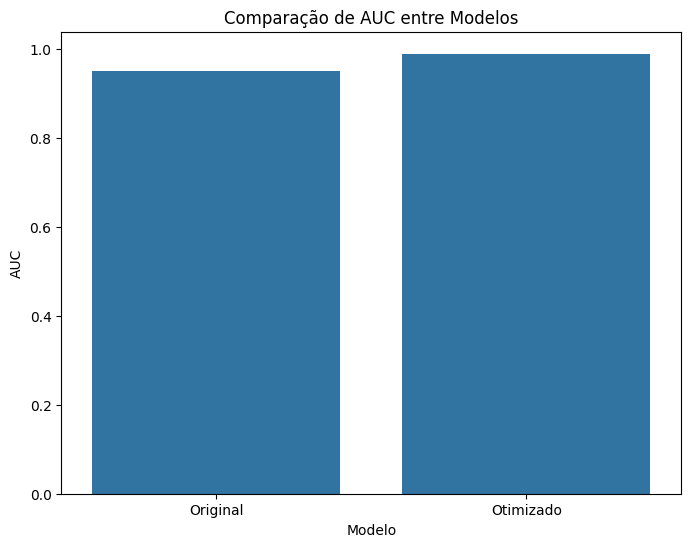

In [121]:
# Criando um DataFrame para armazenar as métricas
results = pd.DataFrame({
    'Modelo': ['Original', 'Otimizado'],
    'Accuracy': [0.9992, accuracy],
    'Precision': [0.8823, precision],
    'Recall': [0.6363, recall],
    'F1-Score': [0.7407, f1_score],
    'AUC': [0.9509, roc_auc_score(y_test, model.predict(X_test))]
})

# Plotando os gráficos
fig = make_subplots(rows=2, cols=2, subplot_titles=('Accuracy', 'Precision', 'Recall', 'F1-Score'))

fig.add_trace(go.Bar(x=results['Modelo'], y=results['Accuracy'], name='Accuracy'), row=1, col=1)
fig.add_trace(go.Bar(x=results['Modelo'], y=results['Precision'], name='Precision'), row=1, col=2)
fig.add_trace(go.Bar(x=results['Modelo'], y=results['Recall'], name='Recall'), row=2, col=1)
fig.add_trace(go.Bar(x=results['Modelo'], y=results['F1-Score'], name='F1-Score'), row=2, col=2)

fig.update_layout(height=600, width=800, title_text="Comparação de Métricas entre Modelos")
fig.show()

# Gráfico para AUC
plt.figure(figsize=(8, 6))
sns.barplot(x='Modelo', y='AUC', data=results)
plt.title('Comparação de AUC entre Modelos')
plt.show()